<a href="https://colab.research.google.com/github/RayOfLight07/Deep-Learning/blob/main/DL_LAB_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Deep learning Lab_________________________________________________________________________Name: Deepasnhu Rathore     
B.Tech. 5th Sem.
#**Experiment:- 03**
# Basic neural network implimentation for application specific classification task using tesor flow/pytorch

Date:19\08\2025____________________________________________________________________________________SAP: 500124406

***Step 1: Setup and Data Loading***

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
from google.colab import files
import zipfile
import io

# Set plot style
sns.set(style="whitegrid")

print("TensorFlow Version:", tf.__version__)

TensorFlow Version: 2.19.0


*Upload and Unzip Your Dataset*

In [ ]:
# Upload your dataset zip file
# Please upload the zip file containing 'bmw.csv'
uploaded = files.upload()

# Assuming the zip file is named 'archive.zip' or similar and contains 'bmw.csv'
# Find the zip file name from the uploaded dictionary keys
file_name = list(uploaded.keys())[0]

# Now, load the dataset
# The file inside the zip is likely named 'bmw.csv'
try:
    df = pd.read_csv(file_name)
    print("Dataset loaded successfully!")
    print("Dataset shape:", df.shape)
except FileNotFoundError:
    print(f"Error: '{file_name}' not found. Please check the name of the CSV file inside your zip archive.")

Saving BMW_Car_Sales_Classification.csv to BMW_Car_Sales_Classification (3).csv
Dataset loaded successfully!
Dataset shape: (50000, 11)


***Step 2: Data Preprocessing and Exploratory Data Analysis (EDA)***

In [ ]:
# Display the first few rows of the dataframe
print("First 5 rows of the dataset:")
print(df.head())

# Get a concise summary of the dataframe
print("\nDataset Info:")
df.info()

# Check for missing values
print("\nMissing values in each column:")
print(df.isnull().sum())
# If there were missing values, you would handle them here (e.g., df.dropna() or df.fillna())


First 5 rows of the dataset:
      Model  Year         Region  Color Fuel_Type Transmission  Engine_Size_L  \
0  5 Series  2016           Asia    Red    Petrol       Manual            3.5   
1        i8  2013  North America    Red    Hybrid    Automatic            1.6   
2  5 Series  2022  North America   Blue    Petrol    Automatic            4.5   
3        X3  2024    Middle East   Blue    Petrol    Automatic            1.7   
4  7 Series  2020  South America  Black    Diesel       Manual            2.1   

   Mileage_KM  Price_USD  Sales_Volume Sales_Classification  
0      151748      98740          8300                 High  
1      121671      79219          3428                  Low  
2       10991     113265          6994                  Low  
3       27255      60971          4047                  Low  
4      122131      49898          3080                  Low  

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 1

*Exploratory Data Analysis (EDA)*

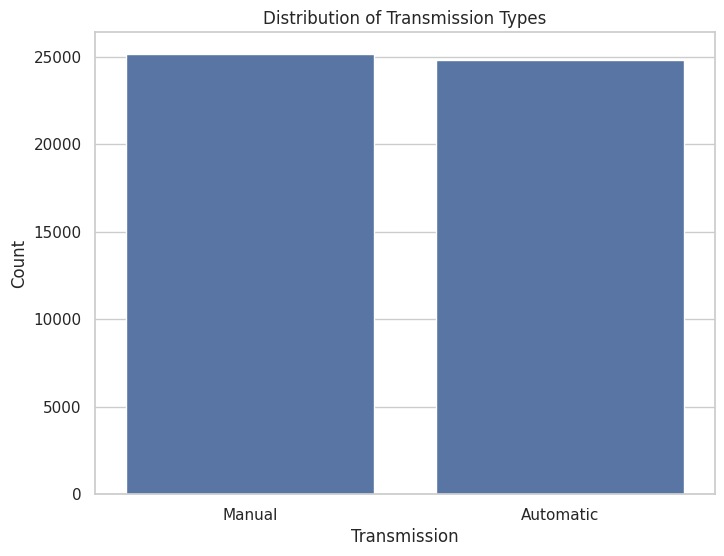

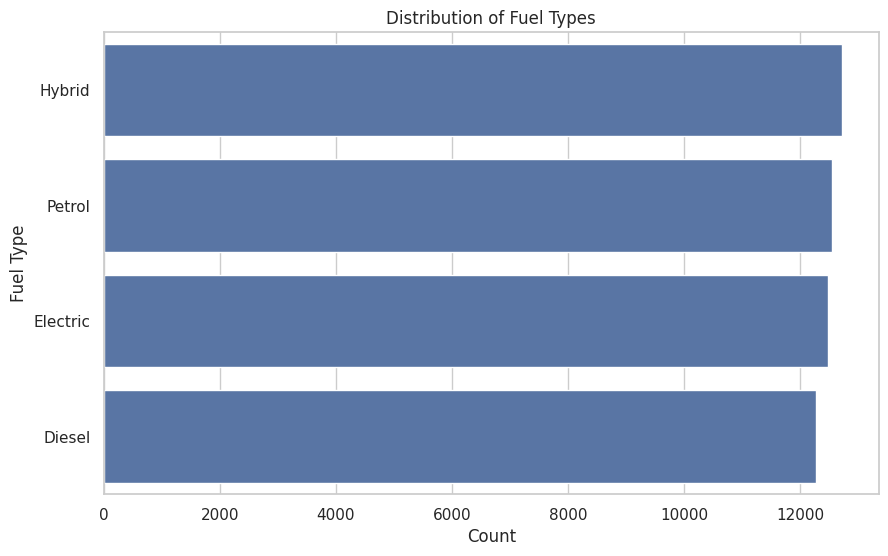

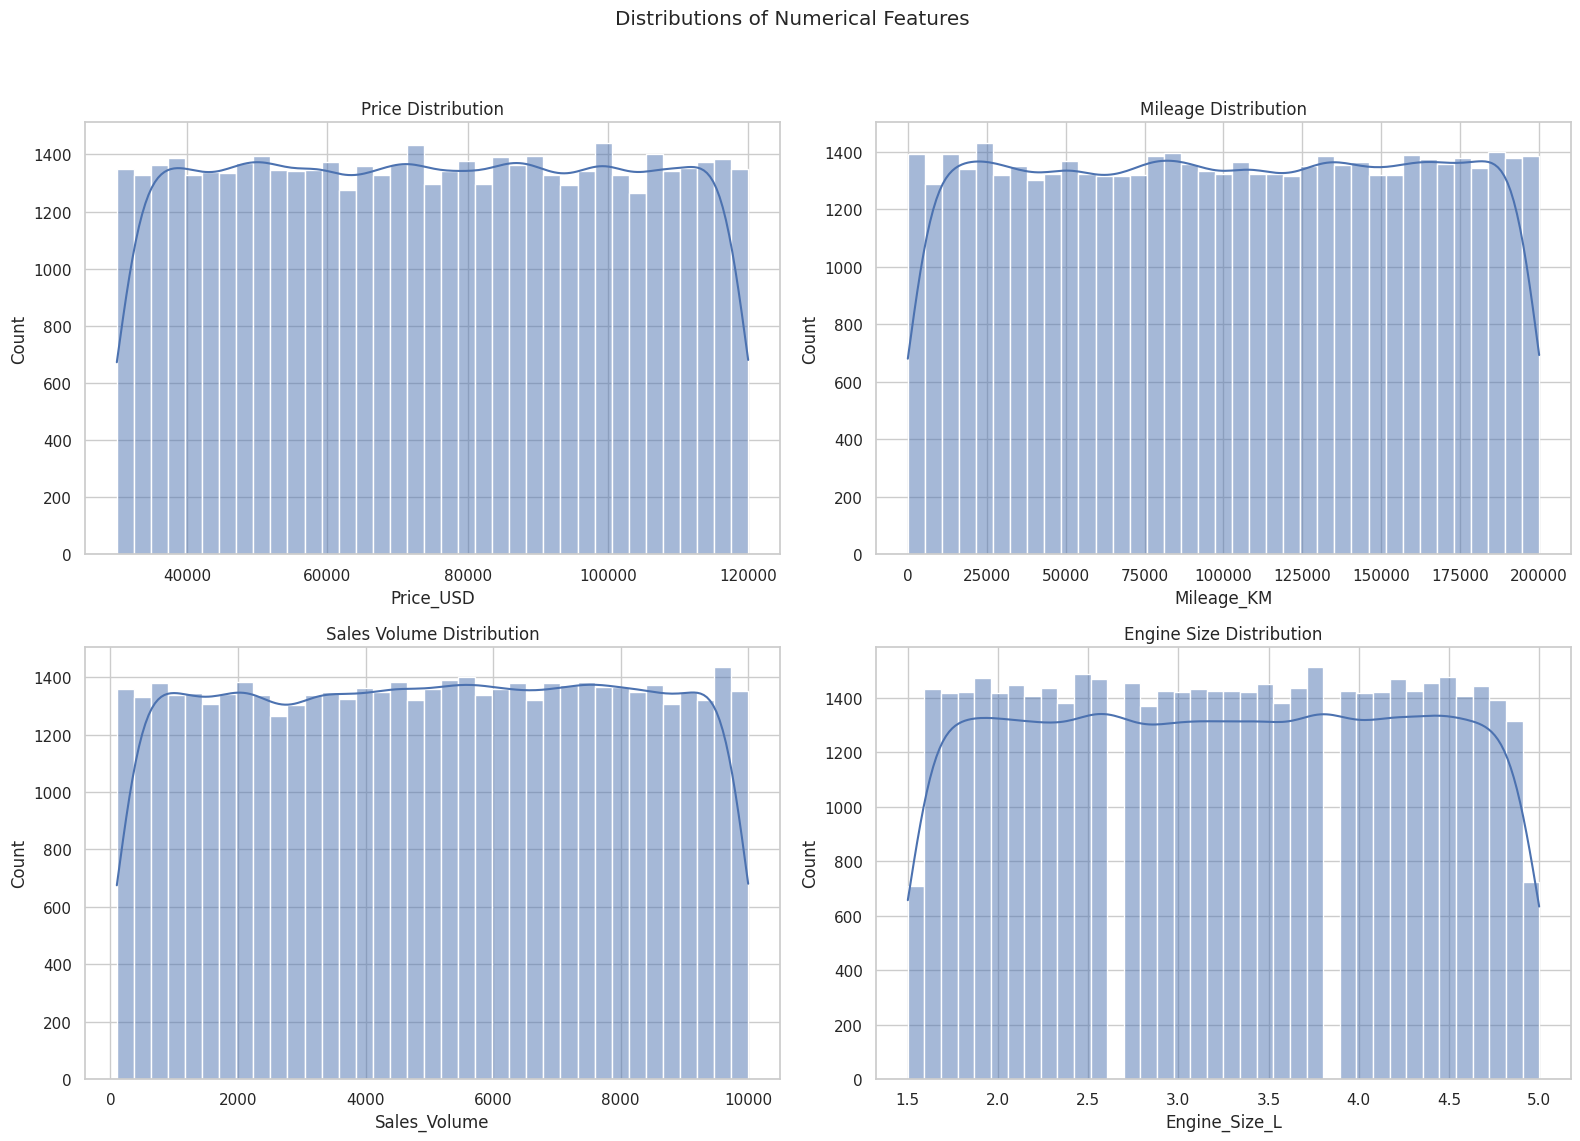

In [ ]:
# Visualize the distribution of the target variable 'transmission'
plt.figure(figsize=(8, 6))
sns.countplot(x='Transmission', data=df)
plt.title('Distribution of Transmission Types')
plt.xlabel('Transmission')
plt.ylabel('Count')
plt.show()

# Visualize the distribution of 'fuelType'
plt.figure(figsize=(10, 6))
sns.countplot(y='Fuel_Type', data=df, order = df['Fuel_Type'].value_counts().index)
plt.title('Distribution of Fuel Types')
plt.xlabel('Count')
plt.ylabel('Fuel Type')
plt.show()

# Visualize numerical data distributions
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Distributions of Numerical Features')

sns.histplot(df['Price_USD'], kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Price Distribution')

sns.histplot(df['Mileage_KM'], kde=True, ax=axes[0, 1])
axes[0, 1].set_title('Mileage Distribution')

sns.histplot(df['Sales_Volume'], kde=True, ax=axes[1, 0])
axes[1, 0].set_title('Sales Volume Distribution')

sns.histplot(df['Engine_Size_L'], kde=True, ax=axes[1, 1])
axes[1, 1].set_title('Engine Size Distribution')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

*Data Preprocessing*

In [ ]:
# Define features (X) and target (y)
# We are predicting 'transmission'
X = df.drop('Sales_Classification', axis=1)
y = df['Sales_Classification']

# Encode the target variable ('transmission') into integers
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
print("Encoded Target Classes:", list(label_encoder.classes_))

# Identify categorical and numerical columns in features
categorical_cols = X.select_dtypes(include=['object']).columns
numerical_cols = X.select_dtypes(include=np.number).columns

# Apply one-hot encoding to categorical features
X = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

# Scale numerical features
scaler = StandardScaler()
X[numerical_cols] = scaler.fit_transform(X[numerical_cols])

print("\nShape of preprocessed features (X):", X.shape)
print("First 5 rows of processed data:")
print(X.head())

Encoded Target Classes: ['High', 'Low']

Shape of preprocessed features (X): (50000, 29)
First 5 rows of processed data:
       Year  Engine_Size_L  Mileage_KM  Price_USD  Sales_Volume  \
0 -0.234876       0.250548    0.887814   0.911817      1.131530   
1 -0.928611      -1.632377    0.368717   0.160951     -0.573911   
2  1.152595       1.241561   -1.541504   1.470514      0.674365   
3  1.615085      -1.533276   -1.260805  -0.540950     -0.357231   
4  0.690105      -1.136871    0.376656  -0.966867     -0.695729   

   Model_5 Series  Model_7 Series  Model_M3  Model_M5  Model_X1  ...  \
0            True           False     False     False     False  ...   
1           False           False     False     False     False  ...   
2            True           False     False     False     False  ...   
3           False           False     False     False     False  ...   
4           False            True     False     False     False  ...   

   Region_South America  Color_Blue  Color_

***Step 3: Build the Neural Network Model***

In [ ]:
# Define the model
model = keras.Sequential([
    # Input layer: The shape must match the number of features in X
    layers.Dense(128, activation='relu', input_shape=[X.shape[1]]),
    layers.Dropout(0.3), # Dropout layer to prevent overfitting

    # Hidden layer
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.2),

    # Output layer: The number of neurons must match the number of classes
    # We use 'softmax' for multi-class classification
    layers.Dense(len(np.unique(y_encoded)), activation='softmax')
])

# Compile the model
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy', # Use this loss for integer-encoded labels
    metrics=['accuracy']
)

# Print the model summary
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         3,840 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2)              │           130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,226 (47.76 KB)

 Trainable params: 12,226 (47.76 KB)

 Non-trainable params: 0 (0.00 B)

***Step 4: Training and Testing***

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

# Train the model
# We'll use a portion of the training data as validation data to monitor performance during training
EPOCHS = 50
BATCH_SIZE = 32

history = model.fit(
    X_train,
    y_train,
    validation_split=0.2, # Use 20% of training data for validation
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    verbose=1 # Show training progress
)

Training set shape: (40000, 29)
Testing set shape: (10000, 29)
Epoch 1/50
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9089 - loss: 0.1961 - val_accuracy: 0.9816 - val_loss: 0.0400
Epoch 2/50
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9776 - loss: 0.0508 - val_accuracy: 0.9847 - val_loss: 0.0324
Epoch 3/50
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9844 - loss: 0.0361 - val_accuracy: 0.9905 - val_loss: 0.0220
Epoch 4/50
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9870 - loss: 0.0290 - val_accuracy: 0.9931 - val_loss: 0.0173
Epoch 5/50
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9899 - loss: 0.0240 - val_accuracy: 0.9933 - val_loss: 0.0162
Epoch 6/50
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9903 - loss: 0.0230 - val_accuracy: 0.9926 - val_loss: 0.0173
Epoch 7/50
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9919 - loss: 0.0194 - val_accuracy: 0.9933 - val_loss: 0.0151
Epoch 8/50
1000/1000 ━━━━━━

***Step 5: Performance Evaluation***

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9951 - loss: 0.0131

Test Accuracy: 99.57%
Test Loss: 0.0108
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step

Classification Report:
              precision    recall  f1-score   support

        High       0.99      0.99      0.99      3049
         Low       1.00      1.00      1.00      6951

    accuracy                           1.00     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       1.00      1.00      1.00     10000



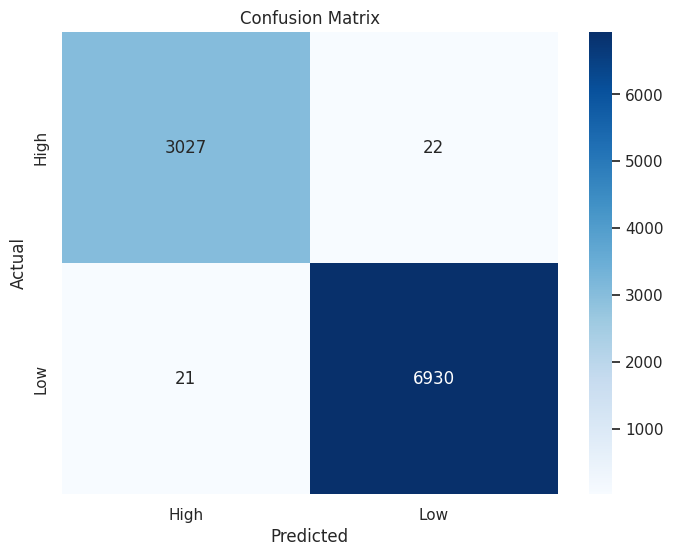

In [ ]:
# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)
print(f"\nTest Accuracy: {accuracy*100:.2f}%")
print(f"Test Loss: {loss:.4f}")

# Make predictions
y_pred_prob = model.predict(X_test)
y_pred = np.argmax(y_pred_prob, axis=1)

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

# Display confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()


*Visualize Training History*

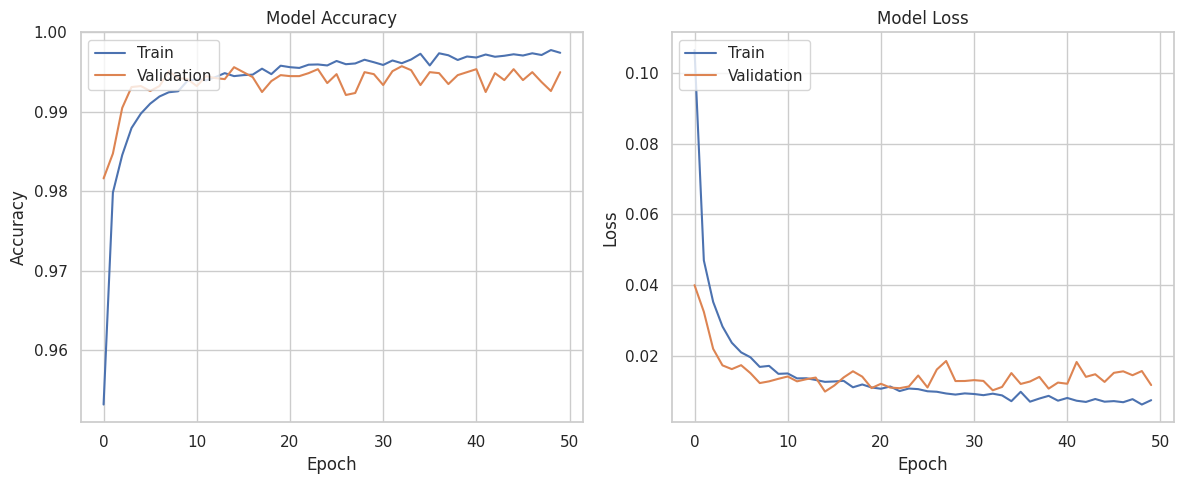

In [ ]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()